# Python to Quant


## Choice library when get data

Consider library list 

**Pandas Datareader**

> https://pypi.org/project/pandas-datareader/
- 2k start

**yfinance**

>https://pypi.org/project/yfinance/
- 8k star

I choice `yfinace`, cuz it is more descirbed from get data and more star of git

## Get Data and Draw Chart

In [72]:

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

In [12]:
aayf = yf.Ticker ("AAPL")
aayf.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 164000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand rad

In [45]:
st = datetime(2020,1,1)
ed = datetime(2022,12,31)

pd_apple= aayf.history(start=st, end=ed)

pd_apple.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,72.554916,73.622769,72.297754,73.561539,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,72.777797,73.617869,72.618601,72.846375,146322800,0.0,0.0


In [46]:
import matplotlib.pyplot as plt
import finterstellar as fs # jusg draw chart

In [47]:

print(f"table columns {pd_apple.columns}\n table index : {pd_apple.index}")

df_apple = pd_apple[['Close']]

print(df_apple.columns)
df_apple.head(2)

table columns Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
 table index : DatetimeIndex(['2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               ...
               '2022-12-16 00:00:00-05:00', '2022-12-19 00:00:00-05:00',
               '2022-12-20 00:00:00-05:00', '2022-12-21 00:00:00-05:00',
               '2022-12-22 00:00:00-05:00', '2022-12-23 00:00:00-05:00',
               '2022-12-27 00:00:00-05:00', '2022-12-28 00:00:00-05:00',
               '2022-12-29 00:00:00-05:00', '2022-12-30 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=756, freq=None)
Index(['Close'], dtype='object')


,Close
Date,
2020-01-02 00:00:00-05:00,73.561539
2020-01-03 00:00:00-05:00,72.846375


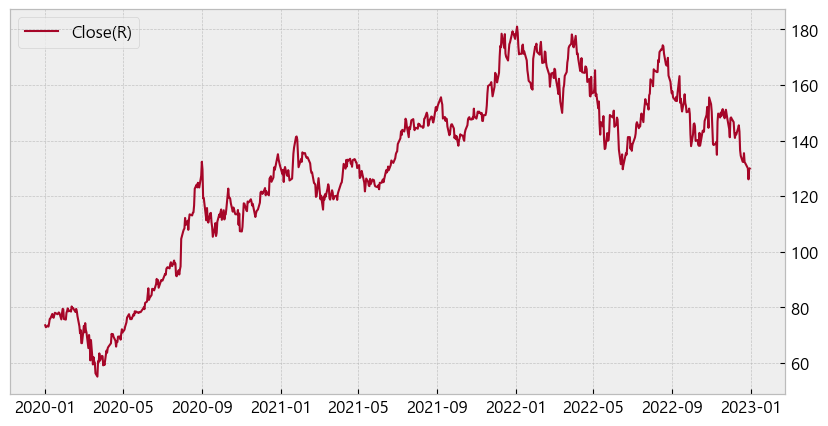

In [48]:
fs.draw_chart(pd_apple, right="Close")

In [65]:
df = df_apple
w = 14
if len(df) > w:
    df['diff'] = df.iloc[:,0].diff()   # 일별 가격차이 계산
    df['au'] = df['diff'].where(df['diff']>0, 0).rolling(w).mean()
    df['ad'] = df['diff'].where(df['diff']<0, 0).rolling(w).mean().abs()
    for r in range(w+1, len(df)):
        df['au'][r] = ( df['au'][r-1]*(w-1) + df['diff'].where(df['diff']>0,0)[r] ) / w
        df['ad'][r] = ( df['ad'][r-1]*(w-1) + df['diff'].where(df['diff']<0,0).abs()[r] ) / w
    df['rsi'] = (df['au'] / (df['au'] + df['ad']) * 100).round(2)
apple_rsi = df[[df.columns[0], 'rsi']]

In [71]:
df_apple['rsi'] = apple_rsi['rsi']

df_apple

,Close,abc,diff,au,ad,rsi
Date,,,,,,
2020-01-02 00:00:00-05:00,73.561539,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,72.846375,-0.715164,-0.715164,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,73.426819,0.580444,0.580444,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,73.081482,-0.345337,-0.345337,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,74.257111,1.175629,1.175629,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,131.860001,-0.369995,-0.369995,0.837951,1.509602,35.69
2022-12-27 00:00:00-05:00,130.029999,-1.830002,-1.830002,0.778097,1.532488,33.68
2022-12-28 00:00:00-05:00,126.040001,-3.989998,-3.989998,0.722519,1.708024,29.73


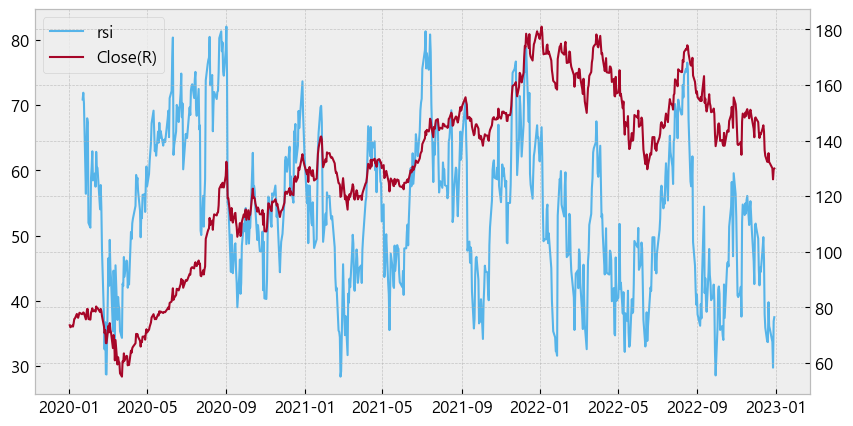

In [70]:
fs.draw_chart(df, left='rsi', right='Close')

## Calculate Backtesting

What if just trading using value of `rsi`?

get make method to trading

In [ ]:
def indicator_to_signal(df, factor, buy, sell) :
    df['trade'] = np.nan